### 회귀 모델이란 무엇인가?

* 회귀 모델은 어떤 연속형 데이터 Y와 Y의 원인으로 추정되는 X간의 관계를 추정하기 위해 만든 함수이다.
* Y = f(X) + e (noise 보정)
* 여기서 e는 통계학에서 부차적인 오차를 보정하기 위한 확률 변수를 의미한다. ex) 부피 = W * 온도

### 무엇이 어디로 "회귀"하는가?

* regression의 사전적 의미는 "한바퀴 돌아 제자리로 돌아가다" 이다.
* regression model에서 핵심은 "무엇이 어디로 회귀하는 것인가?" 이다.
* 회귀 모델의 핵심 원리는 잔차(RSS)가 평균으로 회귀하는 것을 의미한다.
* 엄밀히 따지면, 회귀 모델링에서 오차의 합이 최소가 되는 패턴을 찾는 것은 절반만 맞다!

### 모델링 = 모델의 관계식 추정 + 파라미터 추정

1. 항상 모델의 예측차와 실측치 사이에 차이는 존재한다.
2. 정확한 모델의 잔차는 평균 값인 0으로 회귀하지만, 부정확한 모델은 그렇지 못하다.

* 잔차의 원인이 현실에서 존재할 수 밖에 없는 잡음인지 아니면, 고려하지 못한 속성 때문인지 구분이 필요하다.
* 잔차의 정규 분포 여부, 잔차와 독립변수 X간의 상관관계(X), 잔차 자신 또한 독립이어야 한다.
* 잔차의 분포가 일정해야 함 (잔차의 등분산성)

### 잔차의 정규성을 확인하라
* 잔차의 분포를 검증하는 여러 방법을 활용할 수 있다. (히스토그램, P-value, normal quantile plot 등등)

### 잔차의 독립성을 확인하라
* X와의 상관성
* 자기 자신과의 상관성
* 상관성을 확인하는 가장 쉬운 방법은 피어슨 상관 계수를 구하는 것이다.
* 독립변수 X와 각각의 잔차간의 상관 관계를 scatter plot을 이용해 확인해볼 수 있다.
* 시계열 데이터의 경우, 자기 자신과의 상관성 검증이 매우 중요하다.(모델에 잔차에 대한 자기 상관 관계를 반영해야함)

### 결론

* 회귀 모델에서 중요한 것은 잔차의 값이 최소가 되는 패턴을 찾는 것과 동시에, 잔차의 회귀를 만족해야 한다.
* 여기서 잔차의 회귀는 평균 값이 0으로의 수렴하는 성질을 의미한다.

참고 웹페이지 : https://brunch.co.kr/@gimmesilver/17#comment

### 경사하강법 (Gradient descent)

* W1, W0의 임의의 값을 설정하고, 비용 함수의 값을 계산한다.
* 비용함수의 미분계수 (순간 변화율에 대한 함수식)를 계산하여, 가중치의 보정치를 계산한다.
* 가중치에 보정치를 업데이트 하여 비용 함수의 값을 계산한다.
* 위에 패턴을 반복하면서 비용 함수의 값이 최소가 되는 가중치의 조합을 찾아내서, 반복을 중지한다.

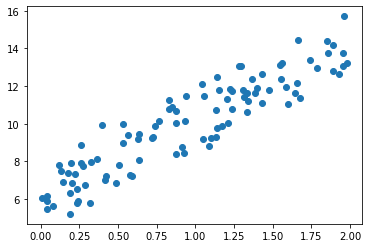

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함

In [2]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [3]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


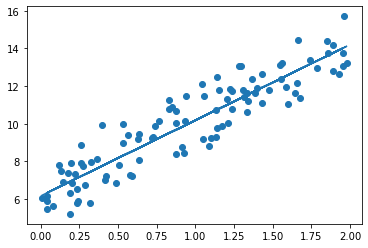

In [6]:
plt.scatter(X, y)
plt.plot(X,y_pred)

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


### 다항 회귀 (Polynomial Regression)

* 다항회귀는 2차, 3차 방정식과 같이 다항식으로 표현된다.
* Y = w0 + (w1 * x1) + (w2 * x2) + (w3 * x1 * x2) + (w4 * x1^2) + (w5 * x2^2)
* 다항 회귀는 "선형 회귀"이다. 회귀 계수가 선형/비선형인지에 따라 선형 회귀와 비선형 회귀를 구분한다.

### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

* model complexity : 학습 데이터의 패턴을 얼마나 학습할 것인가?
* 과소적합 (모델이 덜 복잡하다. 고편향 & 저분산)
* 과대적합 (모델이 복잡하다. 저편향 & 고분산)


![model accuracy](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png)

* 편향이 너무 높으면 전체 예측 값들의 평균적인 오류가 커진다.
* 분산이 너무 높으면 특정 예측 값들의 오류는 작아지지만, 나머지 예측 값들의 오류가 커진다.

![trade off](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

* 분산 & 편향 트레이드 오프에 대한 참고 강의 : https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

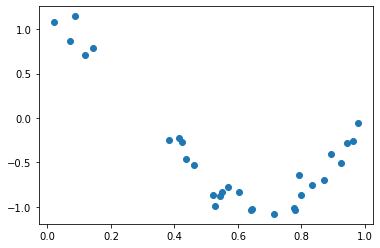

In [10]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415900e+06  2.03716020e+07
 -1.44873197e+08  7.09315193e+08 -2.47065814e+09  6.24561298e+09
 -1.15676589e+10  1.56895083e+10 -1.54006206e+10  1.06457414e+10
 -4.91378328e+09  1.35919894e+09 -1.70381130e+08] 입니다.
Degree 15 MSE 는 181082440.25 입니다.


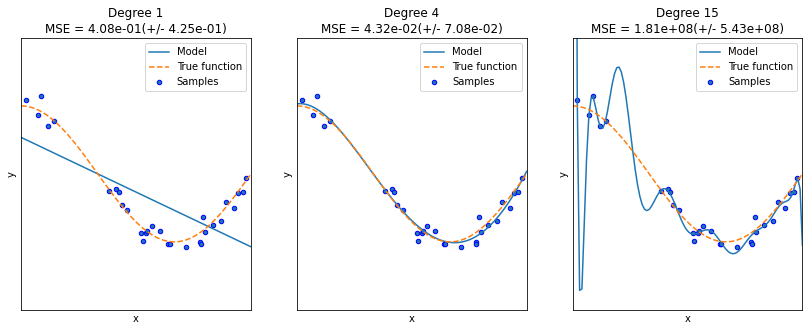

In [11]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()